In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-vajj7njd because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
from utils import *

In [3]:
plt.rcParams['figure.figsize'] = (14,10)
font = {'family' : 'DejaVu Sans',  'weight' : 'normal',  'size'  : 22}
plt.rc('font', **font)

In [4]:
df = pd.read_csv('dataset.csv')

In [5]:
df

,filename,width,height,class,bboxes,total_bolts
0,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,4032,3024,Bolt,"[[3605, 883, 3800, 1077], [1699, 364, 1893, 55...",10
1,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,4032,3024,Bolt,"[[431, 2375, 626, 2570]]",1
2,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,1512,2016,Bolt,"[[904, 1783, 1003, 1886], [188, 117, 292, 210]...",8
3,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,4032,3024,Bolt,"[[3480, 2385, 3680, 2580]]",1
4,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,1512,2016,Bolt,"[[248, 1227, 348, 1327], [1263, 153, 1363, 256...",3
...,...,...,...,...,...,...
174,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,4032,3024,Bolt,"[[1449, 364, 1644, 559], [2492, 374, 2687, 573...",11
175,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,4032,3024,Bolt,"[[391, 404, 591, 598], [1454, 414, 1654, 608]]",2
176,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,4032,3024,Bolt,"[[287, 284, 486, 484], [2492, 294, 2697, 494],...",7
177,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,4032,3024,Bolt,"[[376, 2375, 571, 2570], [3410, 414, 3610, 613]]",2


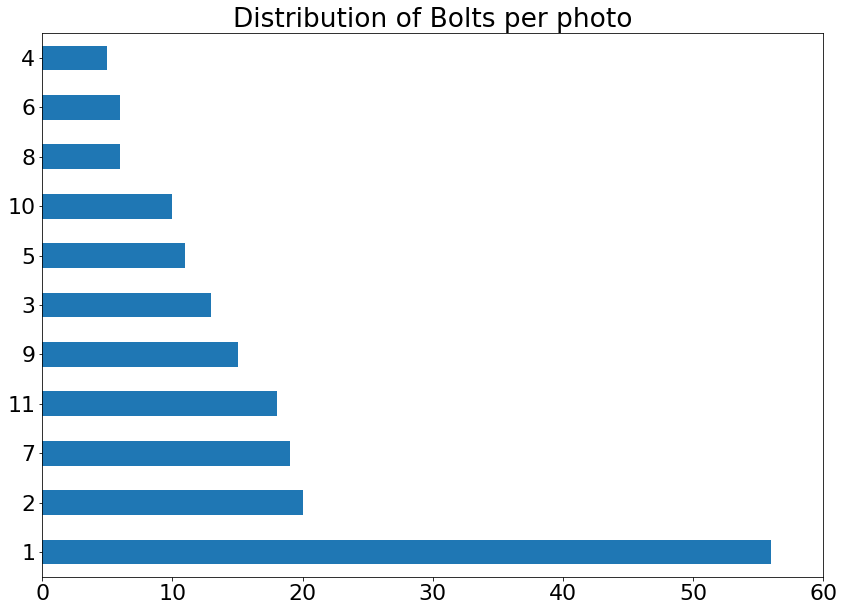

In [6]:
df.total_bolts.value_counts().plot(kind='barh')
plt.title('Distribution of Bolts per photo')
plt.xlim(0,60)
plt.show()

In [7]:
df['fold'] = -1

In [8]:
df

,filename,width,height,class,bboxes,total_bolts,fold
0,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,4032,3024,Bolt,"[[3605, 883, 3800, 1077], [1699, 364, 1893, 55...",10,-1
1,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,4032,3024,Bolt,"[[431, 2375, 626, 2570]]",1,-1
2,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,1512,2016,Bolt,"[[904, 1783, 1003, 1886], [188, 117, 292, 210]...",8,-1
3,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,4032,3024,Bolt,"[[3480, 2385, 3680, 2580]]",1,-1
4,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,1512,2016,Bolt,"[[248, 1227, 348, 1327], [1263, 153, 1363, 256...",3,-1
...,...,...,...,...,...,...,...
174,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,4032,3024,Bolt,"[[1449, 364, 1644, 559], [2492, 374, 2687, 573...",11,-1
175,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,4032,3024,Bolt,"[[391, 404, 591, 598], [1454, 414, 1654, 608]]",2,-1
176,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,4032,3024,Bolt,"[[287, 284, 486, 484], [2492, 294, 2697, 494],...",7,-1
177,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,4032,3024,Bolt,"[[376, 2375, 571, 2570], [3410, 414, 3610, 613]]",2,-1


In [9]:
skf = StratifiedKFold(n_splits=5)

In [10]:
for fold_number, (train_index, val_index) in enumerate(skf.split(X=df['filename'], y=df['total_bolts'])):
    df.loc[df.iloc[val_index].index, 'fold'] = fold_number

In [11]:
df.fold.value_counts()

0    36
1    36
2    36
3    36
4    35
Name: fold, dtype: int64

In [12]:
df

,filename,width,height,class,bboxes,total_bolts,fold
0,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,4032,3024,Bolt,"[[3605, 883, 3800, 1077], [1699, 364, 1893, 55...",10,0
1,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,4032,3024,Bolt,"[[431, 2375, 626, 2570]]",1,0
2,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,1512,2016,Bolt,"[[904, 1783, 1003, 1886], [188, 117, 292, 210]...",8,0
3,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,4032,3024,Bolt,"[[3480, 2385, 3680, 2580]]",1,0
4,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,1512,2016,Bolt,"[[248, 1227, 348, 1327], [1263, 153, 1363, 256...",3,0
...,...,...,...,...,...,...,...
174,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,4032,3024,Bolt,"[[1449, 364, 1644, 559], [2492, 374, 2687, 573...",11,4
175,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,4032,3024,Bolt,"[[391, 404, 591, 598], [1454, 414, 1654, 608]]",2,4
176,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,4032,3024,Bolt,"[[287, 284, 486, 484], [2492, 294, 2697, 494],...",7,4
177,/home/jovyan/work/COREF/src/Bolt_Detection/Tra...,4032,3024,Bolt,"[[376, 2375, 571, 2570], [3410, 414, 3610, 613]]",2,4


In [13]:
df.to_csv('dataset_strat.csv', index=False)